In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [51]:
from sklearn import datasets
X,y=datasets.make_moons(100,noise=0.10)
print(np.shape(X),np.shape(y))

(100, 2) (100,)


In [52]:
y=y.reshape(-1,1)
np.shape(y)

(100, 1)

In [53]:
from sklearn.model_selection import train_test_split
features,X_test,labels,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [54]:
np.random.seed(0);
wh=np.random.rand(len(features[0]),4);
wo=np.random.rand(4,1);
print(np.shape(wh),np.shape(wo));

(2, 4) (4, 1)


In [55]:
def sigmoid(y):
    return 1/(1+np.exp(-y))

In [56]:
def der_sig(y):
    return sigmoid(y)*(1-sigmoid(y))

In [57]:
l=0.001
epochs=10000
for i in range(epochs):
    
    #feed forward
    yh=features.dot(wh) #linear eq. for hidden layer
    sh=sigmoid(yh)      #applying non-linear function for hidden layer 
    
    yo=sh.dot(wo) #linear eq. for output layer
    so=sigmoid(yo) #applying non-linear function for output layer
    
    #Back propagation
    #outer layer
    loss=so-labels
    der_1=der_sig(yo)
    xo=sh
    
    go=xo.T.dot(loss*der_1)
    
    #inner layer
    dup_wo=wo
    elem_1=np.dot(loss*der_1,dup_wo.T)
    der_2=der_sig(yh)
    xh=features.T
    gh=xh.dot(elem_1*der_2)
    
    #updating weight
    wh=wh-l*gh
    wo=wo-l*go
    
    

In [67]:
y1=X_test.dot(wh)
s1=sigmoid(y1)

y2=s1.dot(wo)
s2=sigmoid(y2)

for j in range(len(y_test)):
    if s2[j]>0.5:
        s2[j]=1
    else:
        s2[j]=0

In [69]:
accuracy=0
for k in range(len(y_test)):
    if y_test[k]==s2[k]:
        accuracy+=1
print("Accuracy = ",accuracy/len(y_test))
        

Accuracy =  0.85


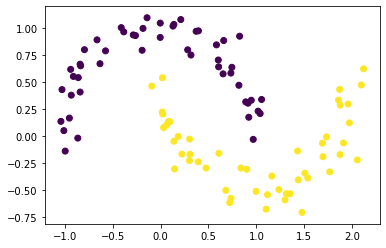

In [75]:
#plotting
y=y.reshape(-1)
plt.scatter(X[:,0],X[:,1],c=y)